In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import inspect, os
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
grand_parentdir = os.path.dirname(os.path.dirname(currentdir))
os.sys.path.insert(0,grand_parentdir) 

from src.campaign_analysis import *
from src.conversion_analysis import get_conversion_clicks, plot_conversion_rate,get_conversion_rate_breakdowns
from db_utils import get_hive_timespan, query_hive_ssh
from fr_utils import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from dateutil import relativedelta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set-Up Code

In [25]:
start = '2014-12-01 00:00'
stop = '2015-01-02 00:00'


dsk_lg = '.*lg.* C14_en5C_dec_dsk_FR'
dsk_sm = '.*tp.* C14_en5C_dec_dsk_FR'

mob_lg = '.*lg.* C14_en5C_dec_mob_FR'
mob_sm = '.*tp.* C14_en5C_dec_mob_FR'

ipd_lg = '.*lg.* C14_en5C_dec_ipd_FR'
ipd_sm = '.*tp.* C14_en5C_dec_ipd_FR'

In [26]:
# fetch data
click = get_clicks(start, stop, campaign_reg = 'C14_en5C_dec_.*_FR', fields = ['name'])
don = get_donations(start, stop, campaign_reg = 'C14_en5C_dec_.*_FR', fields = ['name'])
imp = get_impressions(start, stop, campaign_reg = 'C14_en5C_dec_.*_FR')

In [27]:
# set up regular expressions for grouping data
dsk = '|'.join([dsk_lg, dsk_sm]) 
mob = '|'.join([mob_lg, mob_sm])
ipd = '|'.join([ipd_lg, ipd_sm])
lg = '|'.join([dsk_lg, mob_lg, ipd_lg]) 
sm = '|'.join([dsk_sm, mob_sm, ipd_sm]) 


all_regs = collections.OrderedDict()
all_regs['Desktop Large'] = dsk_lg
all_regs['Desktop Small'] = dsk_sm
all_regs['Mobile Large'] = mob_lg
all_regs['Mobile Small'] = mob_sm
all_regs['Ipad Large'] = ipd_lg
all_regs['Ipad Samll'] = ipd_sm


device_regs = collections.OrderedDict()
device_regs['Desktop'] = dsk
device_regs['Ipad'] = ipd
device_regs['Mobile'] = mob

size_regs = collections.OrderedDict()
size_regs['Large'] = lg
size_regs['Small'] = sm

dsk_regs = collections.OrderedDict()
dsk_regs['Large Desk'] = dsk_lg
dsk_regs['Top Desk'] = dsk_sm

mob_regs = collections.OrderedDict()
mob_regs['Large Mob'] = mob_lg
mob_regs['Small Mob'] = mob_sm

ipd_regs = collections.OrderedDict()
ipd_regs['Large Ipad'] = ipd_lg
ipd_regs['Small Ipad'] = ipd_sm

lg_regs = collections.OrderedDict()
lg_regs['Large Desk'] = dsk_lg
lg_regs['Large Mobile'] = mob_lg
lg_regs['Large Ipad'] = ipd_lg


sm_regs = collections.OrderedDict()
sm_regs['Large Desk'] = dsk_sm
sm_regs['Large Mobile'] = mob_sm
sm_regs['Large Ipad'] = ipd_sm


## Impressions: Large vs Small By Device  

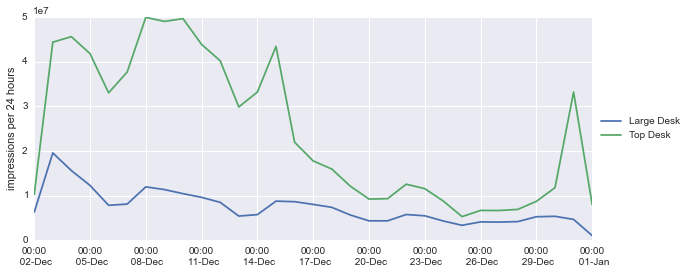

In [28]:
hours = 24
config = {
            'hours' :hours, 
            'ylabel': 'impressions per %d hours' % hours
}

plot_by_time(imp, dsk_regs, **config )


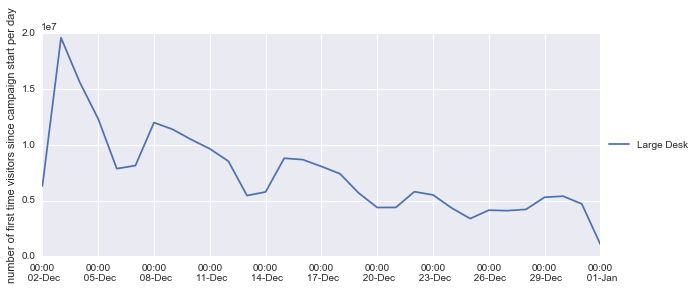

In [29]:
config = {
            'hours' :24, 
            'start': '2014-12-1 00',
            'ylabel': 'number of first time visitors since campaign start per day'
}

plot_by_time(imp, {'Large Desk': dsk_regs['Large Desk']}, **config )

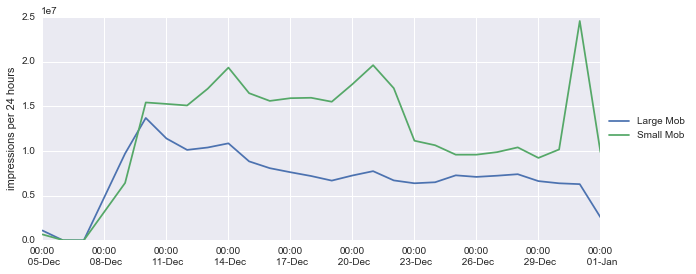

In [30]:
hours = 24
config = {
            'hours' :hours, 
            'start': '2014-12-1 00',
            'ylabel': 'impressions per %d hours' % hours

}
plot_by_time(imp, mob_regs, **config )


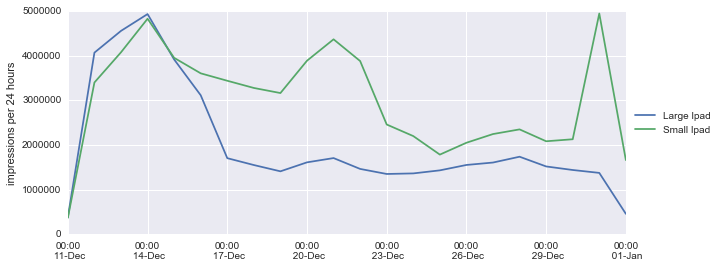

In [31]:

hours = 24
config = {
            'hours' :hours, 
            'ylabel': 'impressions per %d hours' % hours
}
plot_by_time(imp, ipd_regs, **config )

## Donations: Large vs Small By Device 

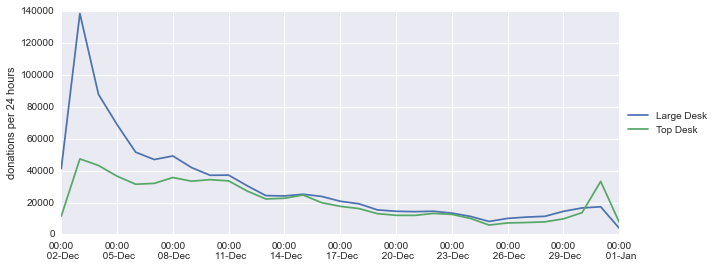

In [32]:
hours = 24
config = {
            'hours' :hours, 
            'ylabel': 'donations per %d hours' % hours
}

plot_by_time(don, dsk_regs, **config)


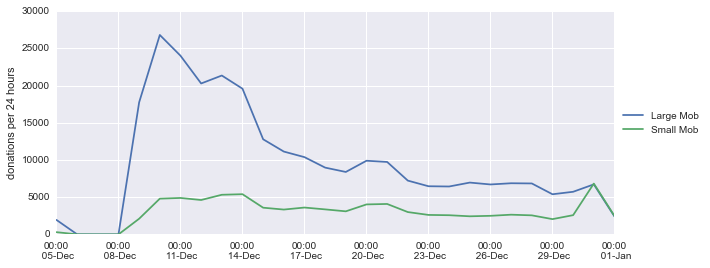

In [33]:
hours = 24
config = {
            'hours' :hours, 
            'ylabel': 'donations per %d hours' %hours
}
plot_by_time(don, mob_regs, **config )


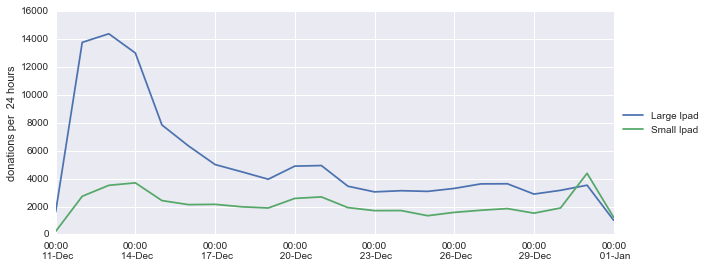

In [34]:
hours = 24
config = {
            'hours' :hours, 
            'start': '2014-12-8 00',
            'ylabel': 'donations per  %d hours' % hours
}
plot_by_time(don, ipd_regs, **config )



On the Ipad, the top screen banners quickly lead to fewer donations than the large screen  banners.

# Donation Rate: Large vs Small By Device

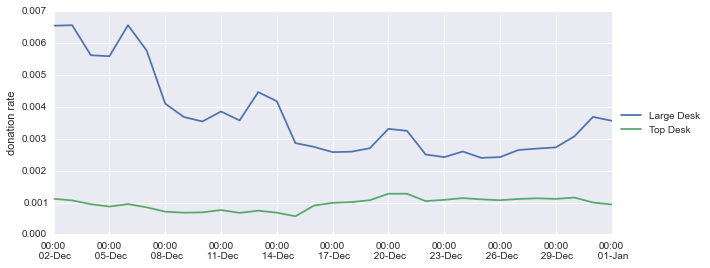

In [35]:
plot_rate_by_time(don, imp, dsk_regs, hours = 24)

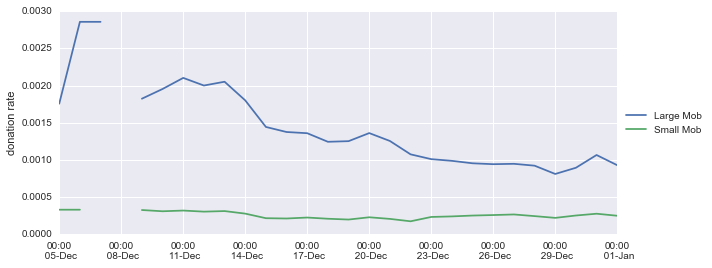

In [36]:
plot_rate_by_time(don, imp, mob_regs, hours = 24 )

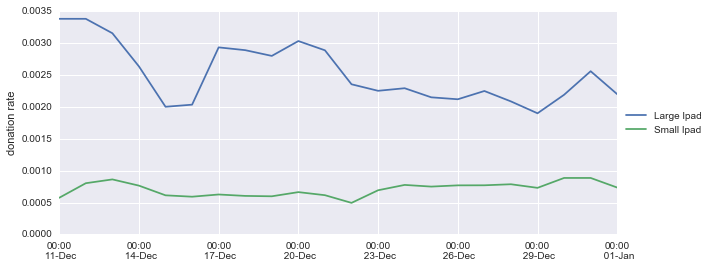

In [37]:
plot_rate_by_time(don, imp, ipd_regs, hours = 24 )

## Large Banner Donation Rate By Device

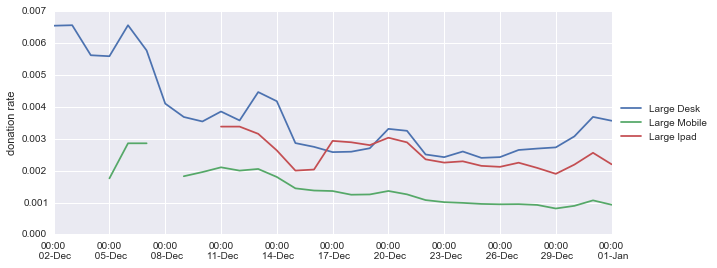

In [38]:
plot_rate_by_time(don, imp, lg_regs, hours = 24 )

## Small Banner Donation Rate By Device

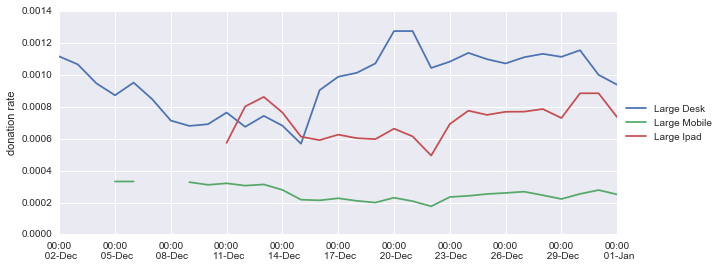

In [39]:
plot_rate_by_time(don, imp, sm_regs, hours = 24 )

## Amount/Day by Banner Size

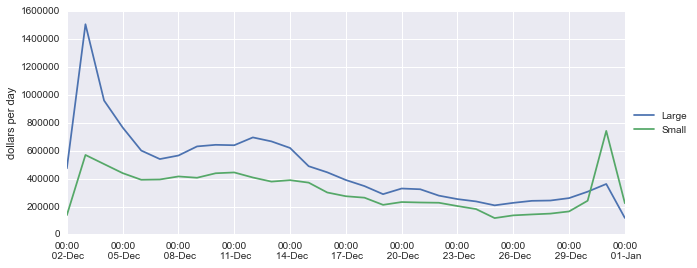

In [40]:
config = {
        'hours' : 24, 
        'amount' : True,
        'ylabel' : 'dollars per day'
}

fig = plot_by_time(don, size_regs, **config )

## Amount/Day by Device

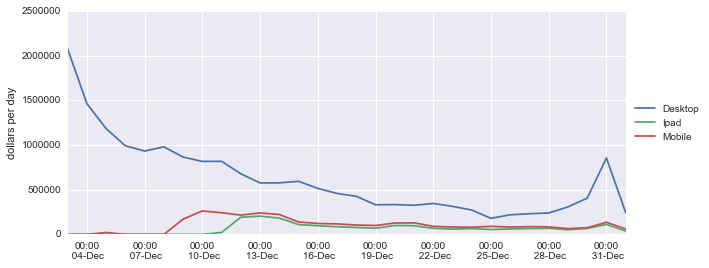

In [41]:
config = {
        'hours' : 24, 
        'amount' : True,
        'start' : '2014-12-3 00',
        'ylabel' : 'dollars per day'
}


fig = plot_by_time(don, device_regs, **config )

You can use these daily totals from last year as your daily goals for this year

## Cumulative Total per Day By Device

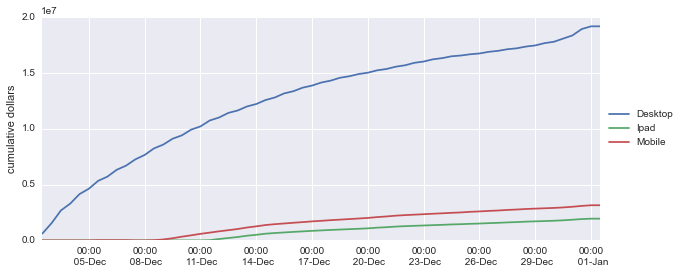

In [42]:
config = {
    'hours': 12,
    'amount': True,
    'cum' : True,
    'ylabel' : 'cumulative dollars',
    'interactive': False,
    'normalize' : False
}

plot_by_time(don, device_regs , **config)


This plot shows the amount raised from the start of the campaign for each day.

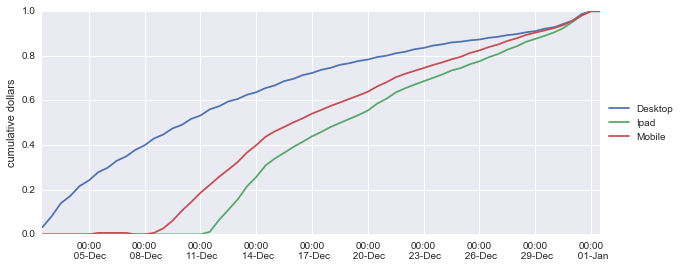

In [43]:
config = {
    'hours': 12,
    'amount': True,
    'cum' : True,
    'ylabel' : 'cumulative dollars',
    'interactive': False,
    'normalize' : True
}

plot_by_time(don, device_regs , **config)


This plot shows the fraction of total amount raised for the entire campaign from the start of the campaign for each day. We reached half of our goal 9 days into a 30 day camapign.

## Quick view of Donation Amount Totals

In [44]:
get_dollar_break_downs(don, all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
Dollars,10945315,8238132,2317267,832586,1386198,654557


In [45]:
get_dollar_break_downs(don, size_regs)

,Large,Small
Dollars,14648781,9725277


In [46]:
get_dollar_break_downs(don, device_regs)

,Desktop,Ipad,Mobile
Dollars,19183447,1948112,3149854


## Quick View of Donation Number totals

In [47]:
get_donation_number_break_downs(don, all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
# Donations,944227,654631,270871,84893,114081,46859


In [48]:
get_donation_number_break_downs(don, size_regs)

,Large,Small
# Donations,1329179,786383


In [49]:
get_donation_number_break_downs(don, device_regs)

,Desktop,Ipad,Mobile
# Donations,1598858,154070,355764


## Quick View of Impression Number Totals

In [50]:
get_impression_break_downs(imp, all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
# Impressions,228449800,759376400,191526500,338301300,44315600,66218500


In [51]:
get_impression_break_downs(imp, size_regs)

,Large,Small
# Impressions,464291900,1163896200


In [52]:
get_impression_break_downs(imp, device_regs)

,Desktop,Ipad,Mobile
# Impressions,987826200,101849200,529827800
